In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
dgi = pd.DataFrame({
    'Country': ['OCDE', 'Brasil'],
    'Digital by Design': [0.684, 0.622],
    'Data-driven public sector': [0.633, 0.628],
    'Government as a Platform': [0.615, 0.645],
    'Open by Default': [0.525, 0.522],
    'User-Driven': [0.607, 0.639],
    'Proactiveness': [0.567, 0.658],
    'Composite Score': [0.605, 0.619],
}, np.arange(2))

In [29]:
dgi      

,Country,Digital by Design,Data-driven public sector,Government as a Platform,Open by Default,User-Driven,Proactiveness,Composite Score
0,OCDE,0.684,0.633,0.615,0.525,0.607,0.567,0.605
1,Brasil,0.622,0.628,0.645,0.522,0.639,0.658,0.619


In [30]:
dgi = dgi.melt(
    id_vars='Country',
    value_vars=[
        'Digital by Design',
        'Data-driven public sector',
        'Government as a Platform',	
        'Open by Default',	
        'User-Driven',	
        'Proactiveness',
        'Composite Score'
    ],
    var_name='Dimensoes', 
    value_name='Valores'
)

In [31]:
dgi

,Country,Dimensoes,Valores
0,OCDE,Digital by Design,0.684
1,Brasil,Digital by Design,0.622
2,OCDE,Data-driven public sector,0.633
3,Brasil,Data-driven public sector,0.628
4,OCDE,Government as a Platform,0.615
5,Brasil,Government as a Platform,0.645
6,OCDE,Open by Default,0.525
7,Brasil,Open by Default,0.522
8,OCDE,User-Driven,0.607
9,Brasil,User-Driven,0.639


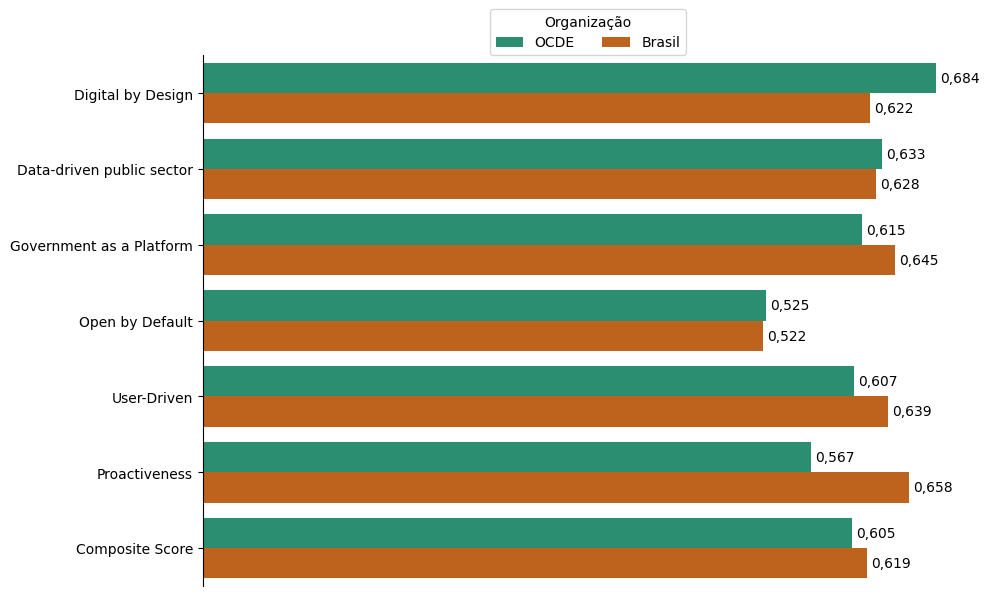

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

bar = sns.barplot(dgi, y='Dimensoes', x='Valores', hue='Country', palette='Dark2')

for containter in bar.containers:
    ax.bar_label(containter, fmt=lambda x: f'{x:.3f}'.replace('.', ','), padding=3)

ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_visible(False)
ax.legend(title='Organização', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=2)
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Dissertacao-Mestrado-PoderJud-EGDI/figuras/comparacao_dgi_brasil_mundo_2023.png', dpi=300, bbox_inches='tight')
plt.show()